In [1]:
#import the necessary modules 
%matplotlib inline 
import numpy as np 
import matplotlib.pylab as plt 
import pandas as pd 
import scipy
import sklearn
import itertools 
from itertools import cycle 
import os.path as op
import timeit 
import json
import math

# These imports are for creating the percent occupancy heat map 
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
import multiprocessing as m_proc
m_proc.cpu_count()

4

In [3]:
# Import MDAnalysis
import MDAnalysis as mda
from MDAnalysis.analysis import *
import statsmodels as stats

AttributeError: module 'MDAnalysis.analysis' has no attribute 'rdf_s'

### Calculate radius of gyration and persistence length of PLGA/water simulations

In [ ]:
def get_rg_pers_poly(polymer_atoms, universe, start, end):
    """This function will calculate the average radius of gyration and persistence length of a polymer within a 
    trajectory block."""
    
    
    
    
    
    
    
    
    
    
    return pers_rg_pol

In [ ]:
# I want a list of total fraction of contacts where length is determined by no. of blocks and a dictionary 
# of contact groups as keys and list of fractional contacts as values(length of list will be no. of blocks)
def bavg_frac_cnt(no_of_blks, prot_atoms, g2_atoms, dmax, universe, no_surf, begin, final):
 
    n_size = (final - begin)/no_of_blks
    
    frcb = []
    
    ot_dab = {}
    universe.trajectory[begin]
    
    sf_lbl = ["Avg Radius of gyration", "Avg persistence length"]

    blk_nparr = np.zeros(shape=((len(sf_lbl)-1),1,no_of_blks))
    
    for i in range(no_of_blks):
        
        start = universe.trajectory.frame
        print(start)
    
        end = int(start + n_size)
        print(end)
       
        
        
        
        
        
        
        
        
        
        universe.trajectory[end]
    # Save fractional contacts for each AA group type, each element in the value array corresponds to a block 
    # calculated value
    for i in range(len(sf_lbl)-1):
        ot_dab[sf_lbl[i]] = blk_nparr[i,0,:]
    
    # total fraction of contacts within the specified blocks    
    ot_dab[sf_lbl[5]] = np.array(frcb)   
    
    return ot_dab
        

### Water only systems

In [4]:
n6_plga_wat = mda.Universe("n6_plga_50ns/0_xa_soln/confout.gro", "n6_plga_50ns/0_xa_soln/traj_comp.xtc")

In [5]:
n6_plga_wat

<Universe with 19722 atoms>

In [6]:
n6_plga_wat.trajectory

<XTCReader n6_plga_50ns/0_xa_soln/traj_comp.xtc with 5001 frames of 19722 atoms>

In [7]:
#Select the polymer heavy atoms 
poly_n6 = n6_plga_wat.select_atoms("resname sPLG PLG tPLG and not type H")

In [96]:
def seg_org(poly_atoms, n_monomers):
    
    pmecl = []
    count = 0
    for i in range(n_monomers):
        fgrp = []
        count += 1
        n_atm = len(poly_atoms.select_atoms("resid "+str(count)))
        
        if count == 1:
            #print(poly_atoms.select_atoms("resid "+str(count)+" and name O13"))
            pmecl.append(poly_atoms.select_atoms("resid "+str(count)+" and (name O13 O9)"))
            #print(pmecl)
        elif count == 2:
            #print(poly_atoms.select_atoms("name O5 and resid "+str(count)))
            pmecl.append(poly_atoms.select_atoms("(resid "+str(count)+" and name O5) or (resid "+str(count-1)+" and name O9)"))
        
        if count != 2 and count != 1:
            if count == n_monomers:
                pmecl.append(poly_atoms.select_atoms("(resid "+str(count)+" and name O1) or (resid "+str(count-1)+" and name O5)"))
            elif count != n_monomers:
            #print(count)
                pmecl.append(poly_atoms.select_atoms("(resid "+str(count)+" and name O5) or (resid "+str(count-1)+" and name O5)"))

    return pmecl


In [189]:
# write function to average across frames to give ensembled averaged correlation values at each nl value

def pers_length(poly_atoms, n_monomers, len_bond, universe):
    
    ref_atoms = seg_org(poly_atoms,n_monomers)
    
    vec_poly = np.zeros(shape=(3,n_monomers), dtype=float)
    
    len_vec = np.arange(6,dtype=float)
    
    len_vec += 1
    
    len_vec *= float(len_bond)

    vec_poly[2,:] = len_vec

    
    for i in range(n_monomers):
        
        if i == 0: 

            v1 = ref_atoms[i].positions[1] - ref_atoms[i].positions[0]

            v1_norm = v1/(np.linalg.norm(v1))
    
            vec_poly[0,i] = v1_norm.dot(v1_norm)
        
            vec_poly[1,i] = math.degrees(math.acos(v1_norm.dot(v1_norm)))

        elif i != 0:
        
            v2 = ref_atoms[i].positions[0] - ref_atoms[i].positions[1]
       
            v2_norm = v2/(np.linalg.norm(v2)) 
            
            vec_poly[0,i] = np.dot(v1_norm,v2_norm)
        
            vec_poly[1,i] = math.degrees(math.acos(np.dot(v1_norm,v2_norm)))
    
    return vec_poly

In [190]:
p_mat = pers_length(poly_n6,6,5.85,n6_plga_wat)
p_mat

array([[ 9.99999940e-01,  7.94124305e-02, -9.29754257e-01,
         5.61196983e-01,  8.91411066e-01,  2.83423096e-01],
       [ 1.97823410e-02,  8.54452070e+01,  1.58396541e+02,
         5.58613824e+01,  2.69489001e+01,  7.35353875e+01],
       [ 5.85000000e+00,  1.17000000e+01,  1.75500000e+01,
         2.34000000e+01,  2.92500000e+01,  3.51000000e+01]])

In [188]:
p_mat[2,:].shape

(6,)

In [191]:
mda.analysis.polymer.fit_exponential_decay(p_mat[2,:], p_mat[0,:])

9.610981446225

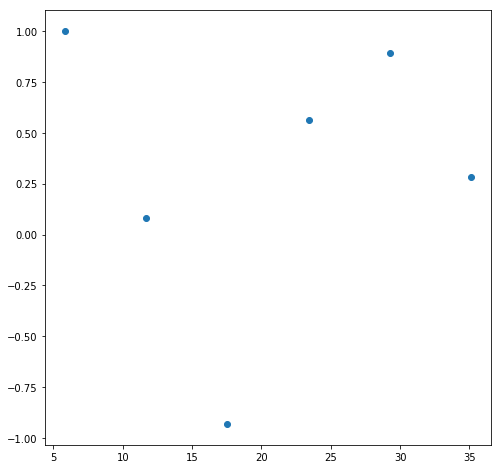

In [193]:
plt.figure(figsize=(8,8))
plt.scatter(p_mat[2,:],p_mat[0,:])

In [ ]:
poly_n6.radius_of_gyration()

In [ ]:
lbond = np.zeros(shape=(1,5000))
count = 0
for ts in n6_plga_wat.trajectory[0:5000]:
    oo_len = mda.analysis.distances.distance_array(o9_atom.positions, o5_plg1.positions, box=n6_plga_wat.trajectory.ts.dimensions)
    lbond[0, count] = oo_len
    count += 1

lbond

In [ ]:
lb_avg = np.mean(lbond)

In [ ]:
x = np.arange(5000)
plt.figure(figsize=(8,8))
plt.scatter(x,lbond)

In [ ]:
n8_plga_wat = mda.Universe("n8_plga_50ns/0_xa_soln/confout.gro", "n8_plga_50ns/0_xa_soln/traj_comp.xtc")

In [ ]:
n8_plga_wat

In [ ]:
#Select the polymer heavy atoms 
poly_n8 = n8_plga_wat.select_atoms("resname sPLG PLG tPLG and not type H")

In [ ]:
pl_n8 = seg_org(poly_n8, 8)

In [ ]:
n10_plga_wat = mda.Universe("n10_plga_50ns/0_xa_soln/confout.gro", "n10_plga_50ns/0_xa_soln/traj_comp.xtc")

In [ ]:
n10_plga_wat

In [ ]:
poly_n10 = n10_plga_wat.select_atoms("resname sPLG PLG tPLG and not type H")

In [ ]:
pl_n10 = seg_org(poly_n10, 10)
pl_n10

In [ ]:
n20_plga_wat = mda.Universe("n20_plga_150ns/0_xa_soln/nowat_n20.gro", "n20_plga_150ns/0_xa_soln/n20_nowater0xa.xtc")

In [ ]:
n20_plga_wat

In [ ]:
poly_n20 = n20_plga_wat.select_atoms("resname sPLG PLG tPLG and not type H")

In [ ]:
n30_plga_wat = mda.Universe("n30_plga_150ns/0_xa_soln/0xa_n30sys.gro", "n30_plga_150ns/0_xa_soln/0xa_n30.xtc")

In [ ]:
n30_plga_wat

In [ ]:
poly_n30 = n30_plga_wat.select_atoms("resname sPLG PLG tPLG and not type H")

In [ ]:
n20_plga_ace = mda.Universe("n20_plga_150ns/1_xa_soln/1xa_n20sys.gro", "n20_plga_150ns/1_xa_soln/1xa_n20.xtc")

In [ ]:
n20_plga_ace

In [ ]:
poly_n20_ace = n20_plga_ace.select_atoms("resname sPLG PLG tPLG and not type H")

In [ ]:
pl_n20_ace = seg_org(poly_n20_ace, 20)
pl_n20_ace